Please do comment if necessary wherever on the notebook .

# Health-care cost prediction with Linear Regression

We are going to create a linear model using the data obtained from https://www.kaggle.com/ruslankl/health-care-cost-prediction-w-linear-regression/data

Importing the necessary Libraries

In [26]:
#initialization of the library and packages:
import pandas as pd
from plotnine import *
from matplotlib import *
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set()
plt.rcParams['patch.force_edgecolor'] = True
plt.rcParams['axes.labelweight'] = 'bold'
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV

## Importing the dataset and first introspection 

In [27]:
##Preparing the dataset:
insuranceData = pandas.read_csv('insurance.csv')

Describing the dataset by looking at the first 5 columns

In [28]:
#Displaying the top five data from the dataset:
insuranceData.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Age: insurance contractor age, years

Sex: insurance contractor gender, [female, male]

BMI: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

Children: number of children covered by health insurance / Number of dependents

Smoker: smoking, [yes, no]

Region: the beneficiary’s residential area in the US, [northeast, southeast, southwest, northwest]

Charges: Individual medical costs billed by health insurance, $ #predicted value

Now, let's check if there are null values in the data

In [29]:
#Listing all the features/constraints along with their weight:
insuranceData.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No Null Values

# Statistical Methods applied on the dataframe 

In [30]:
insuranceData.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Next ,we will plot some data to see the correlation between different factors

## Charges vs. BMI

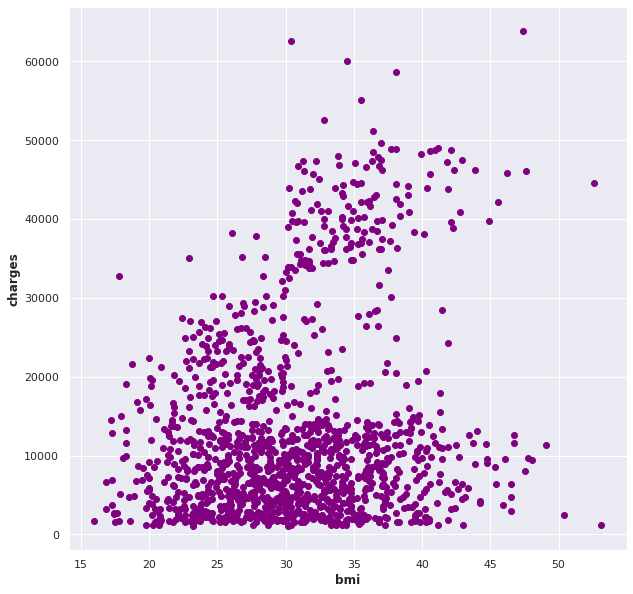

In [31]:
bmi = np.array([insuranceData.bmi])
charges = np.array([insuranceData.charges])
plt.figure(figsize=(10,10))
plt.xlabel("bmi")
plt.ylabel("charges")
x = plt.scatter(bmi, charges,color = 'purple')



We see that charges are not higher than $40,000 for a person who's on the median of the healthy bmi scale for an adult 
(18-25: Normal) <br>
source : https://health.clevelandclinic.org/whats-a-healthy-bmi/

## Charges vs. Age

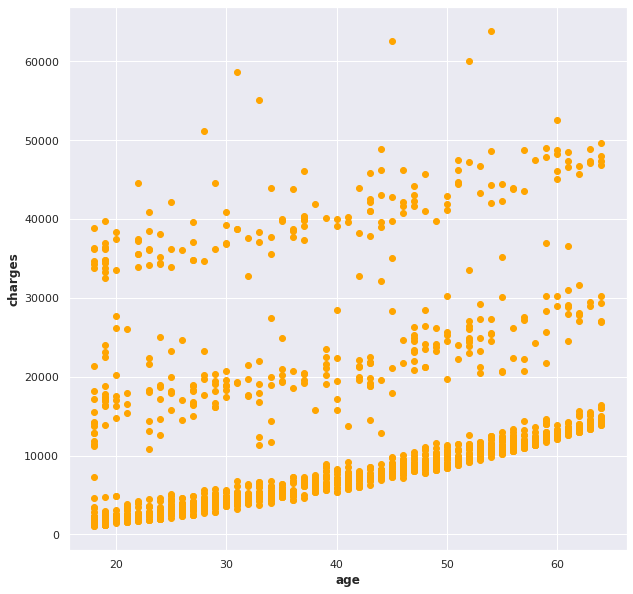

In [32]:
bmi = np.array([insuranceData.bmi])
charges = np.array([insuranceData.charges])
age = np.array([insuranceData.age])
plt.figure(figsize=(10,10))
plt.xlabel("age")
plt.ylabel("charges")
x = plt.scatter(age, charges,color = 'orange')


No clear correlation yet between age and charges. Can you suggest any ? Please feel free to comment.

## Children vs. Charges

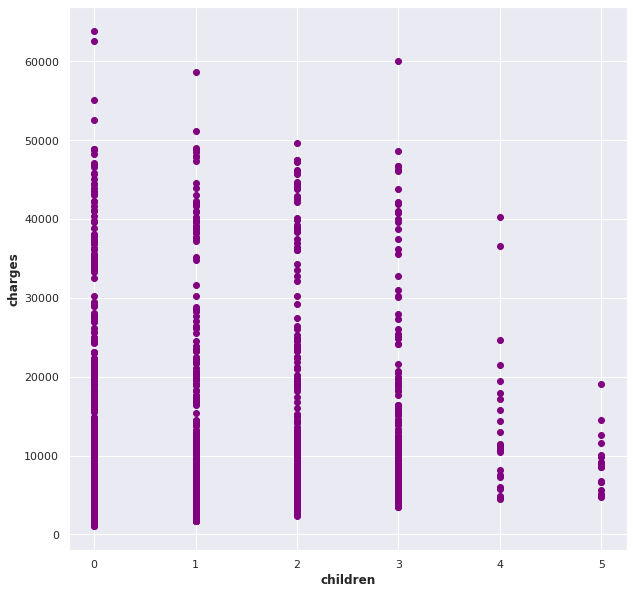

In [33]:
bmi = np.array([insuranceData.bmi])
charges = np.array([insuranceData.charges])
age = np.array([insuranceData.age])
children  = np.array([insuranceData.children])
plt.figure(figsize=(10,10))
plt.xlabel("children")
plt.ylabel("charges")
x = plt.scatter(children, charges,color = 'purple')


Interestingly, people who had > 3 more children, had lower charges than the rest

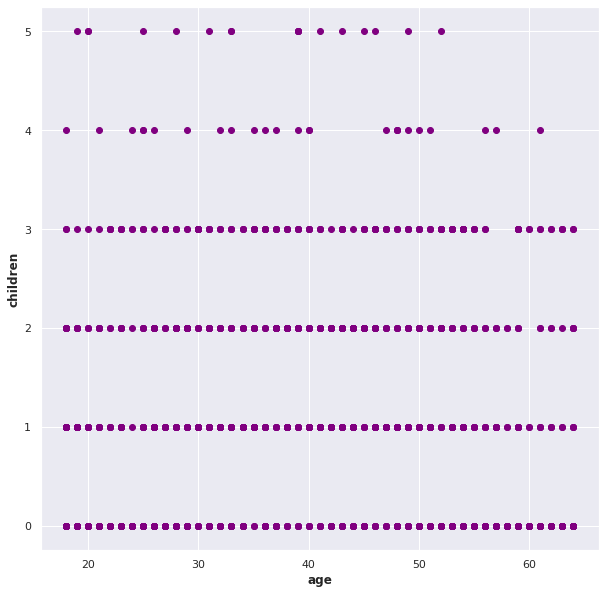

In [34]:
children  = np.array([insuranceData.children])
age = np.array([insuranceData.age])
plt.figure(figsize=(10,10))
plt.xlabel("age")
plt.ylabel("children")
x = plt.scatter(age, children,color = 'purple')


The people having 4 or more kids by their 20's need some therapy perhaps ?

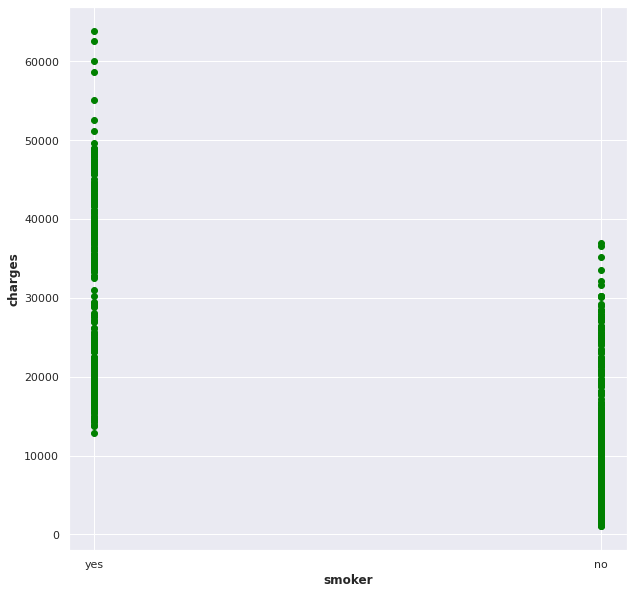

In [35]:
charges = np.array([insuranceData.charges])
smoker =insuranceData.smoker
plt.figure(figsize=(10,10))
plt.xlabel("smoker")
plt.ylabel("charges")
x = plt.scatter(smoker, charges,color = 'green')

As expected, charges for smokers are much higher

# Starting our Regression Model

Converting categorical data into numerical data.

In [36]:
catColumns = ['sex', 'smoker', 'region']
data_dum = pd.get_dummies(insuranceData, columns = catColumns, drop_first=True)
data_dum.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


age, bmi, and smoker_yes as independent variables (x), and charges as the dependent variable (y).
bmi : growing index
charges : insurance fee
And applying a linear regression model

In [37]:
#Building the Regression Model and defining the regularization parameters:
x = data_dum[['age', 'bmi', 'smoker_yes']] #independent variables
y = data_dum['charges'] #dependent variables
linreg = LinearRegression()
# RidgedCV for 5-fold Cross Validation and setting up the regularization strength(alphas): 
ridgereg = RidgeCV(alphas=(5.1,0.5,0.8,1.0),cv=5)
lassoreg = LassoCV(eps=0.00001, cv = 5)
from sklearn.model_selection import cross_val_score

R-square value is calculated as

In [38]:
#Fitting the model
linreg.fit(x,y) 
#Display the R square value
linreg.score(x,y)

0.7474771588119513

The smaller the R-square value, the weaker the influence of the independent variable on the dependent variable, and vice versa.

Bring up the coefficient and intercept values


In [39]:
#Obtaining the coefficients B1,B2,B3 of the linear regression model
linreg.coef_


array([  259.54749155,   322.61513282, 23823.68449531])

In [40]:
#Intercept value (B0) 
linreg.intercept_

-11676.830425187782

Based on the output, the intercept value is -11676.830. And beta coefficients B1, B2, and B3 are 259,547, 322,615, and 23823,684 respectively. The regression model can be written, y = -11676.830 + 259.547x1 + 322.615x2 + 23823,684x3.

After we get a regression model, we try to make a prediction using the regression model.

In [41]:
#Defining a function to predict the cost
def calc_insurance(age, bmi, smoking):
 y = ((age*linreg.coef_[0]) + (bmi*linreg.coef_[1]) + (smoking*linreg.coef_[2]) - linreg.intercept_)
 return y

We calculate the predictions using the parameters of agi, BMI and smoker_yes in the function calc_insurance we have created

In [42]:
print(calc_insurance(36, 24, 0))
print(calc_insurance(36, 24, 1))
print(calc_insurance(36, 32, 1))
print(calc_insurance(36, 32, 0))

28763.303308712795
52586.98780402163
55167.908866574275
31344.22437126544


In [44]:
print(calc_insurance(56, 40.3, 0))

39212.87980470107
